                                            MY NEXT MOVIE

In [148]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ipywidgets import interact, widgets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import warnings
warnings.filterwarnings('ignore')

In [149]:
movies=pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [150]:
ratings=pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
...,...,...,...,...
105334,668,142488,4.0,1451535844
105335,668,142507,3.5,1451535889
105336,668,143385,4.0,1446388585
105337,668,144976,2.5,1448656898


In [151]:
data=pd.merge(ratings,movies,on='movieId',how='inner')
data

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
105334,668,142488,4.0,1451535844,Spotlight (2015),Thriller
105335,668,142507,3.5,1451535889,Pawn Sacrifice (2015),Drama
105336,668,143385,4.0,1446388585,Bridge of Spies (2015),Drama|Thriller
105337,668,144976,2.5,1448656898,Bone Tomahawk (2015),Horror|Western


Exploratory Data Analysis

In [152]:
data.info()
#so no missing or null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
 4   title      105339 non-null  object 
 5   genres     105339 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [153]:
data.describe(include='all')

,userId,movieId,rating,timestamp,title,genres
count,105339.000000,105339.000000,105339.000000,1.053390e+05,105339,105339
unique,NaN,NaN,NaN,NaN,10323,938
top,NaN,NaN,NaN,NaN,Pulp Fiction (1994),Drama
freq,NaN,NaN,NaN,NaN,325,7678
mean,364.924539,13381.312477,3.516850,1.130424e+09,NaN,NaN
std,197.486905,26170.456869,1.044872,1.802660e+08,NaN,NaN
min,1.000000,1.000000,0.500000,8.285650e+08,NaN,NaN
25%,192.000000,1073.000000,3.000000,9.711008e+08,NaN,NaN
50%,383.000000,2497.000000,3.500000,1.115154e+09,NaN,NaN
75%,557.000000,5991.000000,4.000000,1.275496e+09,NaN,NaN


1.Understanding the Distribution of features:-  


In [154]:
# Display summary statistics for both datasets
print("\nMovies Dataset - Summary Statistics:")
print(data.describe(include='all'))  # Summary for all columns


Movies Dataset - Summary Statistics:
               userId        movieId         rating     timestamp  \
count   105339.000000  105339.000000  105339.000000  1.053390e+05   
unique            NaN            NaN            NaN           NaN   
top               NaN            NaN            NaN           NaN   
freq              NaN            NaN            NaN           NaN   
mean       364.924539   13381.312477       3.516850  1.130424e+09   
std        197.486905   26170.456869       1.044872  1.802660e+08   
min          1.000000       1.000000       0.500000  8.285650e+08   
25%        192.000000    1073.000000       3.000000  9.711008e+08   
50%        383.000000    2497.000000       3.500000  1.115154e+09   
75%        557.000000    5991.000000       4.000000  1.275496e+09   
max        668.000000  149532.000000       5.000000  1.452405e+09   

                      title  genres  
count                105339  105339  
unique                10323     938  
top     Pulp Fictio

In [155]:
print("\nRatings Dataset - Summary Statistics:")
print(data.describe())  # Summary for numerical columns


Ratings Dataset - Summary Statistics:
              userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.000000       1.000000       0.500000  8.285650e+08
25%       192.000000    1073.000000       3.000000  9.711008e+08
50%       383.000000    2497.000000       3.500000  1.115154e+09
75%       557.000000    5991.000000       4.000000  1.275496e+09
max       668.000000  149532.000000       5.000000  1.452405e+09


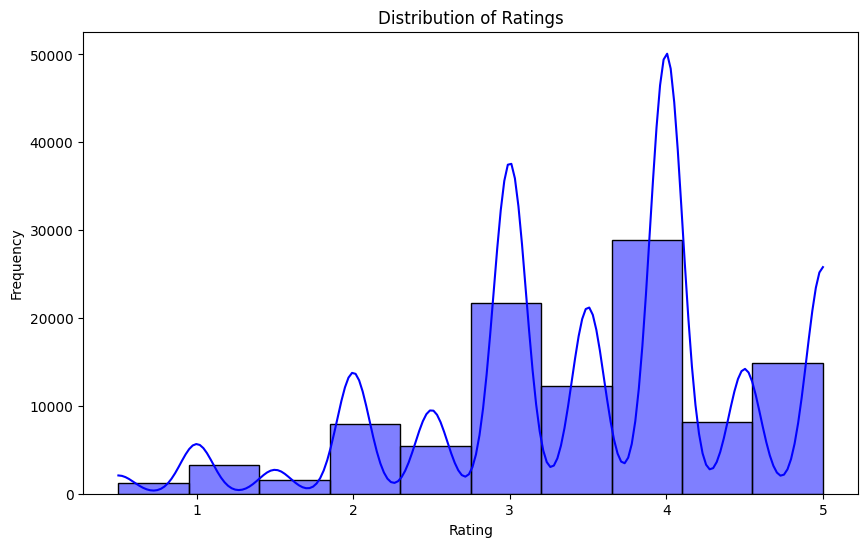

In [156]:
# Plot distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

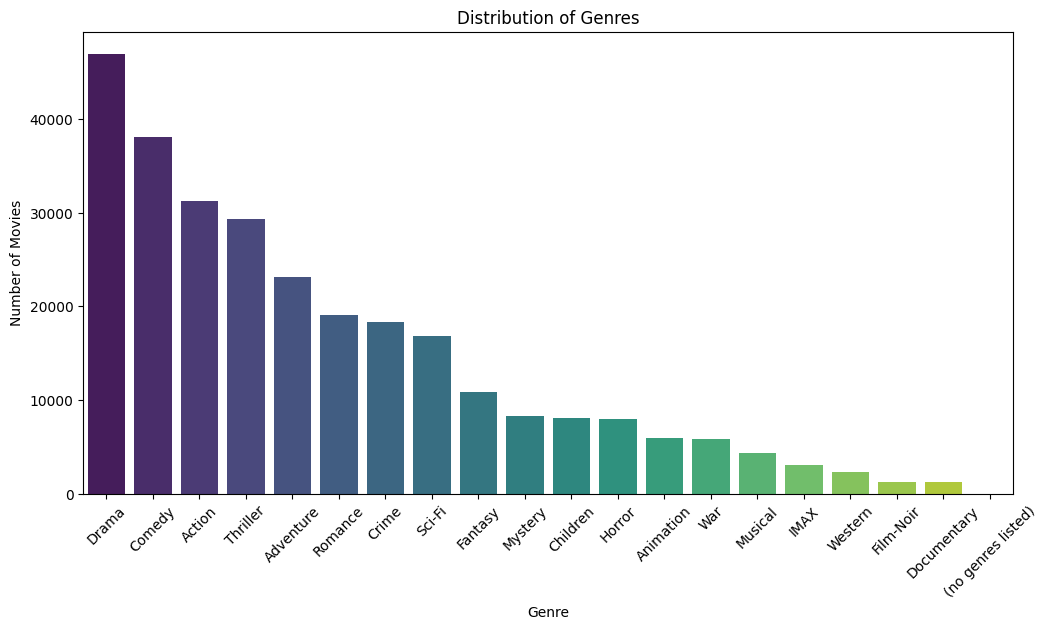

In [157]:
# Analyze the number of movies per genre
genre_counts = data['genres'].str.split('|').explode().value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

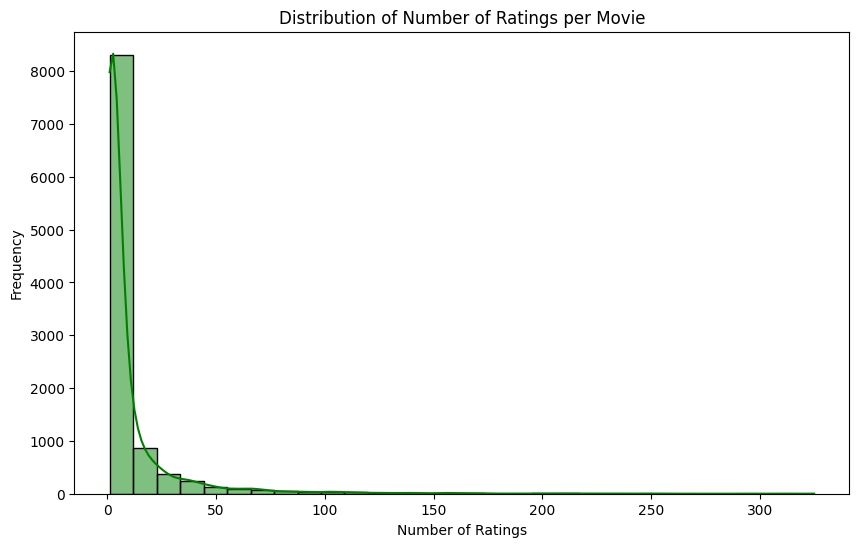

In [158]:
# Analyze the number of ratings per movie
ratings_per_movie = data.groupby('movieId').size()
plt.figure(figsize=(10,6))
sns.histplot(ratings_per_movie,bins=30,kde=True, color='green')
plt.title('Distribution of Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

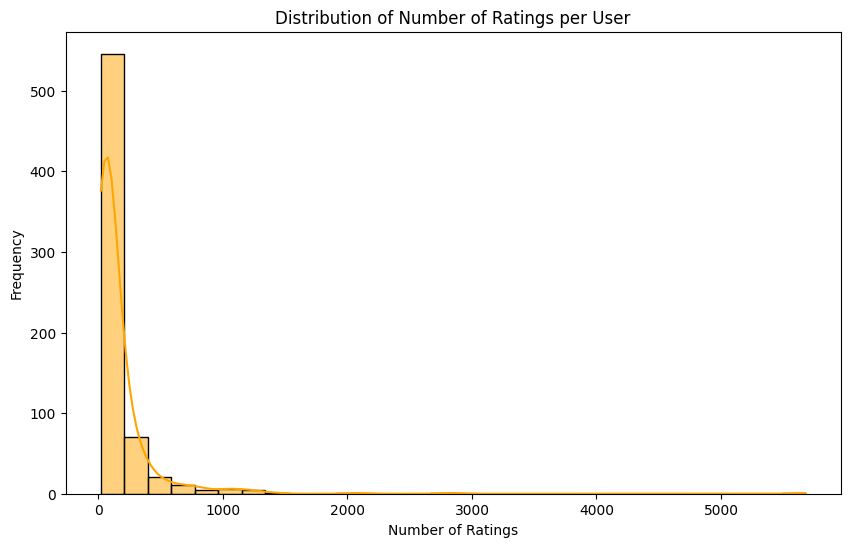

In [159]:
# Analyze the number of ratings per user
ratings_per_user = data.groupby('userId').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, kde=True, color='orange')
plt.title('Distribution of Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

2.Finding unique users and movies

In [160]:
#unique users and their counts
unique_user=data.userId.unique()
unique_user

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [161]:
#count
unique_user.shape[0]

668

In [162]:
#unique movies and their counts
data.movieId.unique()

array([    16,     24,     32, ..., 141472, 142488, 142507])

In [163]:
data.movieId.nunique()

10325

3.Average rating and Total movies at genre level

In [164]:
#average rating at genre level
avg_rating=data.groupby('genres')['rating'].mean().reset_index(name='Avg_rating')
avg_rating

,genres,Avg_rating
0,(no genres listed),3.071429
1,Action,2.836406
2,Action|Adventure,3.739804
3,Action|Adventure|Animation,4.125000
4,Action|Adventure|Animation|Children,3.550000
...,...,...
933,Sci-Fi|Thriller|IMAX,3.500000
934,Thriller,3.473430
935,Thriller|War,3.500000
936,War,3.613636


In [165]:
#total movies at genre level
tot_movies=data.groupby('genres')['movieId'].value_counts().reset_index(name='count')
tot_movies.sort_values(by='count',ascending=False)

,genres,movieId,count
3693,Comedy|Crime|Drama|Thriller,296,325
4627,Comedy|Drama|Romance|War,356,311
5447,Crime|Drama,318,308
516,Action|Adventure|Sci-Fi|Thriller,480,294
6065,Crime|Horror|Thriller,593,290
...,...,...,...
10245,Thriller|War,69354,1
10246,Thriller|War,71011,1
10247,Thriller|War,83577,1
10248,Thriller|War,104642,1


In [166]:
#cross check
data[data['movieId']==296].shape[0]

325

In [167]:
#total movies at genre level
tot_movies=data.groupby('genres')['title'].value_counts().reset_index(name='count')
tot_movies.sort_values(by='count',ascending=False)

,genres,title,count
3693,Comedy|Crime|Drama|Thriller,Pulp Fiction (1994),325
4627,Comedy|Drama|Romance|War,Forrest Gump (1994),311
5447,Crime|Drama,"Shawshank Redemption, The (1994)",308
516,Action|Adventure|Sci-Fi|Thriller,Jurassic Park (1993),294
6065,Crime|Horror|Thriller,"Silence of the Lambs, The (1991)",290
...,...,...,...
10245,Thriller|War,Five Graves to Cairo (1943),1
10246,Thriller|War,Sealed Cargo (1951),1
10247,Thriller|War,"Spy in Black, The (1939)",1
10248,Thriller|War,Went the Day Well? (1942),1


In [168]:
#checking whether the movieId and the title are related
data.loc[data.title=='Pulp Fiction (1994)','movieId']

15       296
166      296
220      296
479      296
730      296
        ... 
99041    296
99142    296
99373    296
99593    296
99791    296
Name: movieId, Length: 325, dtype: int64

4.Unique Genres

In [169]:
uni_genre=pd.DataFrame(data['genres'].value_counts().reset_index(name='Counts'))
uni_genre

,genres,Counts
0,Drama,7678
1,Comedy,6676
2,Comedy|Romance,3733
3,Drama|Romance,3407
4,Comedy|Drama,3101
...,...,...
933,Animation|Comedy|Horror|IMAX,1
934,Adventure|Romance|War,1
935,Adventure|Comedy|Fantasy|Romance|IMAX,1
936,Action|Romance|War,1


In [170]:
#nunique of genres
data['genres'].nunique()

938

In [171]:
# Task 1: Popularity-Based Recommendation System
def popularity_based_recommendation(genre, min_reviews, num_recommendations):
    # Filter movies by genre
    genre_filtered = movies[movies['genres'].str.contains(genre, case=False, na=False)]
    
    # Merge movies with ratings
    merged_data = pd.merge(genre_filtered, ratings, on="movieId")
    
    # Calculate average rating and number of reviews
    movie_stats = merged_data.groupby('title').agg({'rating': ['mean', 'count']})
    movie_stats.columns = ['average_rating', 'num_reviews']
    movie_stats = movie_stats[movie_stats['num_reviews'] >= min_reviews]
    
    # Compute IMDb-style weighted rating
    C = movie_stats['average_rating'].mean()
    m = min_reviews

    def weighted_rating(x, C=C, m=m):
        v = x['num_reviews']
        R = x['average_rating']
        return (v / (v + m) * R) + (m / (m + v) * C)

    movie_stats['weighted_rating'] = movie_stats.apply(weighted_rating, axis=1)
    
    # Sort movies by weighted rating
    top_movies = movie_stats.sort_values(by='weighted_rating', ascending=False).head(num_recommendations)
    return top_movies.drop('weighted_rating',axis=1).reset_index()

In [172]:
#Task 2: Content Based recommendation System
def content_based_recommendation(movie_title, num_recommendations):
    
    if not movie_title or movie_title.strip() == "":
        return pd.DataFrame({"Movie Title": ["Movie not found"]})  # Ensure proper DataFrame format    
    # Create a CountVectorizer for genres
    count_vectorizer = CountVectorizer(preprocessor=lambda x: x.replace('|', ' '))
    genre_matrix = count_vectorizer.fit_transform(movies['genres'])
    
    # Compute cosine similarity matrix
    cosine_sim = linear_kernel(genre_matrix, genre_matrix)
    
    # Get the index of the input movie safely
    matching_movies = movies[movies['title'].str.contains(movie_title, case=False, na=False)]
    if matching_movies.empty:
        return pd.DataFrame({movie_title:['movie not found']})
        
    movie_idx = matching_movies.index[0]  # Take the first match if multiple

    # Get similarity scores
    similarity_scores = list(enumerate(cosine_sim[movie_idx]))
    
    # Sort by similarity scores and get top recommendations
    sorted_movies = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    sorted_movies = [i for i in sorted_movies if i[0] != movie_idx][:num_recommendations]
    
    # Retrieve only movie titles (Similarity Score removed)
    recommendations = [movies.iloc[i[0]]['title'] for i in sorted_movies]
    
    # Return recommendations as a DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=["Movie Title"])
    
    return recommendations_df

In [173]:
# Task 3: Collaborative-Based Recommendation System
def collaborative_based_recommendation(user_id, num_recommendations):
    # Create a user-item matrix
    user_item_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
    user_item_matrix.fillna(0, inplace=True)
    
    # Compute cosine similarity between users
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)
    
    # Check if the user exists
    if user_id not in user_similarity_df.index:
        return pd.DataFrame({'message':["User ID not found in dataset."]})
    
    # Get top 10 similar users
    similar_users = user_similarity_df[user_id].nlargest(10).drop(user_id)
    
    # Get the ratings of similar users
    similar_users_ratings = user_item_matrix.loc[similar_users.index]
    
    # Compute weighted ratings (avoid division by zero)
    weighted_ratings = similar_users_ratings.T.dot(similar_users)
    normalized_ratings = (weighted_ratings / similar_users.sum()).fillna(0)
    
    # Remove movies the user has already rated
    user_rated_movies = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    recommendations = normalized_ratings.drop(index=user_rated_movies, errors='ignore').sort_values(ascending=False).head(num_recommendations)
    
    # Fetch movie titles
    recommendations_df = movies[movies['movieId'].isin(recommendations.index)][['title']]
    recommendations_df['Score'] = recommendations.values
    return recommendations_df.reset_index(drop=True)

In [187]:
#### Main Function to Handle User Inputs
def main():
    print("Which recommendation system would you like to run?")
    print("1. Popularity-Based Recommendation")
    print("2. Content-Based Recommendation")
    print("3. Collaborative-Based Recommendation")
    choice = input("Enter the number of your choice (1/2/3): ")
    
    if choice == '1':
        genre = input("Enter the genre: ")
        min_reviews = int(input("Enter the minimum number of threshold: "))
        num_recommendations = int(input("Enter the number of recommendations: "))
        recommendations = (popularity_based_recommendation(genre, min_reviews, num_recommendations))
        print("\nPopularity-Based Recommendations :")
        print(pd.DataFrame(recommendations))
    
    elif choice == '2':
        movie_title = input("Enter the movie title: ")
        num_recommendations = int(input("Enter the number of recommendations: "))
        recommendations = content_based_recommendation(movie_title, num_recommendations)
        print("\nContent-Based Recommendations :")
        print(pd.DataFrame(recommendations))
    
    elif choice == '3':
        user_id = int(input("Enter the user ID: "))
        num_recommendations = int(input("Enter the number of recommendations: "))
        #threshold = int(input("Enter the similarity threshold (e.g., 100 for 100%): "))
        recommendations = collaborative_based_recommendation(user_id, num_recommendations)
        print("\nCollaborative-Based Recommendations :")
        print(pd.DataFrame(recommendations))
    else:
        print("Invalid choice. Please select 1,2,3.")

# Run the main function
if __name__ == "__main__":
    main()

Which recommendation system would you like to run?
1. Popularity-Based Recommendation
2. Content-Based Recommendation
3. Collaborative-Based Recommendation


Enter the number of your choice (1/2/3):  3
Enter the user ID:  5
Enter the number of recommendations:  67



Collaborative-Based Recommendations :
                                          title     Score
0                             Pocahontas (1995)  2.641869
1                              Apollo 13 (1995)  2.620128
2     Star Wars: Episode IV - A New Hope (1977)  2.300962
3                           Pulp Fiction (1994)  2.264409
4                           Forrest Gump (1994)  2.246691
..                                          ...       ...
62                                Looper (2012)  1.172161
63                   Monsters University (2013)  1.158422
64  Hobbit: The Desolation of Smaug, The (2013)  1.155797
65                        The Lego Movie (2014)  1.154472
66                            Inside Out (2015)  1.145324

[67 rows x 2 columns]


In [175]:
data[(data.title.str.contains('Jumanji',case=False))]

,userId,movieId,rating,timestamp,title,genres
1071,16,2,3.0,849188326,Jumanji (1995),Adventure|Children|Fantasy
2525,29,2,4.0,836818098,Jumanji (1995),Adventure|Children|Fantasy
2855,31,2,4.0,832397674,Jumanji (1995),Adventure|Children|Fantasy
2902,32,2,3.0,903225605,Jumanji (1995),Adventure|Children|Fantasy
3424,38,2,2.0,1408318179,Jumanji (1995),Adventure|Children|Fantasy
...,...,...,...,...,...,...
97620,650,2,4.0,965502886,Jumanji (1995),Adventure|Children|Fantasy
98134,655,2,3.5,1255910655,Jumanji (1995),Adventure|Children|Fantasy
98260,656,2,3.0,838777702,Jumanji (1995),Adventure|Children|Fantasy
98882,662,2,5.0,945179853,Jumanji (1995),Adventure|Children|Fantasy


In [176]:
u=data[(data.userId==3)|(data.title.str.contains('Lion'))]

In [177]:
u[u['title'].str.contains('Dave')]
v=data[data['title'].str.contains('Dave')]
v.loc[v['userId']==9]
c=v.userId.value_counts()
sum(c>=2)

1

In [178]:
data[data.title.str.contains('Star War')]

,userId,movieId,rating,timestamp,title,genres
12,1,260,4.5,1217895864,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
41,1,1196,4.5,1217896095,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
43,1,1210,4.5,1217895912,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
72,1,2628,3.0,1217896237,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
92,1,5378,3.5,1217897078,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
...,...,...,...,...,...,...
100153,668,1210,3.0,1025854484,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
100749,668,2628,3.0,1025857005,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
101752,668,5378,3.0,1173070116,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
103125,668,33493,3.0,1133068592,Star Wars: Episode III - Revenge of the Sith (...,Action|Adventure|Sci-Fi


In [179]:
u=data[data['title'].str.contains('powder',case=False)]
u.movieId.nunique()

2

In [180]:
data[data['userId']==3].shape[0]

73

In [181]:
data.userId.value_counts()

userId
668    5678
575    2837
458    2086
232    1421
310    1287
       ... 
257      20
48       20
51       20
58       20
12       20
Name: count, Length: 668, dtype: int64

In [182]:
data[data['title'].str.contains('toy story',case=False)]

,userId,movieId,rating,timestamp,title,genres
113,2,1,5.0,859046895,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
333,4,3114,5.0,950323407,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
339,5,1,4.0,1303501039,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
629,8,1,5.0,858610933,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
832,11,1,4.0,850815810,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
99034,663,1,3.0,851580006,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
99528,666,3114,4.0,1021281462,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy
99661,668,1,3.0,1025861475,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
100976,668,3114,4.0,1025861475,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy


In [183]:
data['movieId'].value_counts()

movieId
296       325
356       311
318       308
480       294
593       290
         ... 
113132      1
111251      1
111285      1
111458      1
111460      1
Name: count, Length: 10325, dtype: int64

In [184]:
type(ratings_per_movie)

pandas.core.series.Series

In [185]:
data['movieId'].max()

np.int64(149532)